## Assignment 1 

This assignment is based on the video discussed in module 1.

John Rauser ( 2014). Statistics Without the Agonizing Pain. Strata Hadoop 2014. Retrieved from https://www.youtube.com/watch?v=5Dnw46eC-0o

(Source: https://www.youtube.com/watch?v=5Dnw46eC-0o )




 
  
 

## Learning outcomes

- Use code to work with data
- Calculate basic statistical measures 
- Implement a data simulation by using resampling 


**Question**

1. Using the dataset from the video ( _mosquitos_data.csv_) in the folder, write Python code to:

    - Create side-by-side boxplots for the number of mosquitos in each group ( _beer vs water) 
    - What does the graph reveal about the data for both groups?  Is there an association between beer       consumption and attractiveness to mosquitos.
    - Calculate basic statistics measures for each group: Mean, median, standard deviation and explain the numbers.

2. Write code to implement the data simulation demonstrated in the above mentioned video.  Calculate the probability of obtaining the experiment outcome assuming no association between beer consumption.

## Hints

- Use pandas, matplotlib, or seaborn to plot boxplots in Python. 
- Label the graphs wherever applicable e.g, title, legend, units etc.





In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
sns.set() # set as default style

data = pd.read_csv('mosquitos_data.csv')
data.head()

,Response,Treatment
0,27,Beer
1,20,Beer
2,21,Beer
3,26,Beer
4,27,Beer


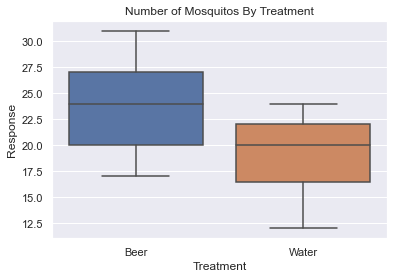

In [2]:
sns.boxplot(x='Treatment', y='Response', data=data).set_title("Number of Mosquitos By Treatment")
plt.show()

# Graph Interpretation
The graph would imply that there is a relationship between beer consumption and attractiveness to mosquitoes. Namely, that beer consumption increases a person's attractiveness to mosquitoes, as compared to water consumption.

The highest value in the 'water' sample is only as high as the median of the 'beer' sample.

In [3]:
# for each group: Mean, median, standard deviation and explain the numbers.

beer = data['Treatment'] == "Beer"
water = data['Treatment'] == 'Water'
beer_info = data[beer].describe()
water_info = data[water].describe()
descrip = beer_info.join(water_info, lsuffix='_beer', rsuffix='_water')
descrip.loc[['mean', '50%', 'std']]

,Response_beer,Response_water
mean,23.600000,19.222222
50%,24.000000,20.000000
std,4.133199,3.671120


# Statistical Measures' Interpretation
The statistical measures give that same message as the boxplots, just numerically instead of graphically.

On average (mean), mosquitoes responded to a beer-consumer more than a water-consumer, even when accounting for standard deviation (std). That difference is 4.4 more responses to beer over water.
The middle of the data (median / 50%) is higher for beer-consumers.

In [4]:
def permu():
    import numpy as np

    results = []
    for i in range(0,50000):
        permu = np.random.permutation(data['Response'])
        results.append(permu[beer].mean() - permu[water].mean())
        
    return results

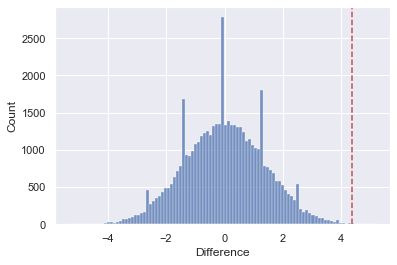

In [5]:
line_val = data[beer]['Response'].mean() - data[water]['Response'].mean()

g = sns.histplot(data=permu())   
g.set_xlabel("Difference")
g.axes.axvline(line_val, ls='--',c='r')


In [6]:
p_total = []
for i in range(0,10):
    res = permu()
    p = res.count(line_val)
    p_total.append(p/len(res))

In [8]:
import numpy as np
np.array(p_total).mean()

0.000122

If there was no association between beer consumption and a person's attractiveness to mosquitoes, the probability that the average difference between the two groups is 4.4 would be 0.01%. This is evidence that there is indeed a relationship between beer consumption and a person's attractiveness to mosquitoes.